In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


### Calculamos el strike justo en forward

In [2]:
S0=5000
T=100
r0_T=0.11567

K_justo = S0*np.exp(r0_T*T/360)
#K_justo esta forma tambien nos da la k justa
print('El strike justo del forward es de :',K_justo)         #OTRA forma

El strike justo del forward es de : 5163.261575007652


### Simular precios y  obtener pay off

In [3]:
S_T = np.arange(3000,7000,200)

F_PosLarga=S_T-K_justo
F_PosCorta=K_justo-S_T



### Graficaremos las funciones de pago de ambas posiciones

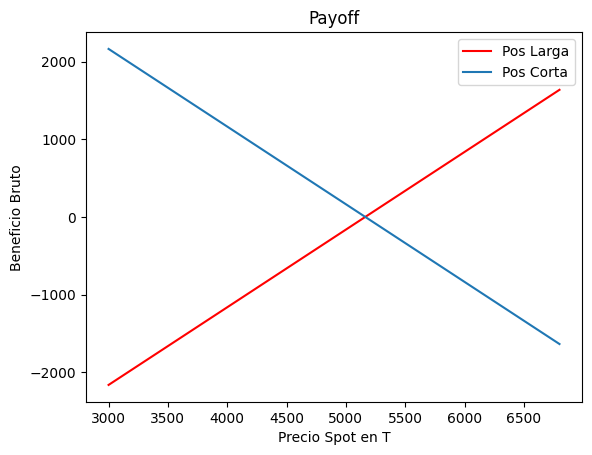

In [4]:
plt.plot(S_T,F_PosLarga, 'red')
plt.plot(S_T,F_PosCorta)

plt.title('Payoff')
plt.xlabel('Precio Spot en T')
plt.ylabel('Beneficio Bruto')
plt.legend(['Pos Larga','Pos Corta'])
plt.show()

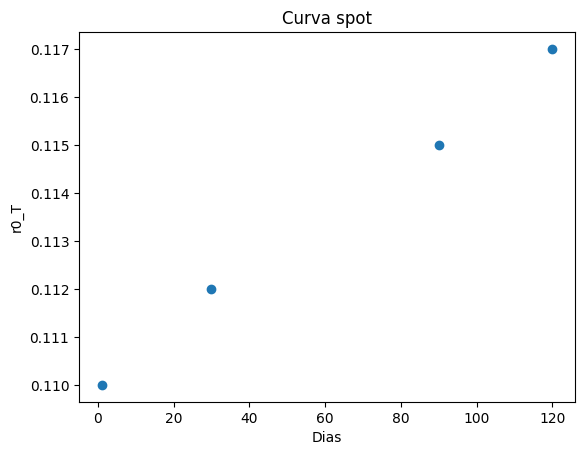

In [8]:
tiempo=[1,30,90,120]
r_t=[0.11,0.112,0.115,0.117]

plt.plot(tiempo,r_t,'o')
plt.title('Curva spot')
plt.xlabel('Dias')
plt.ylabel('r0_T')
plt.show()

### Obtener lo mismo  pero ahora con una curva de tasas

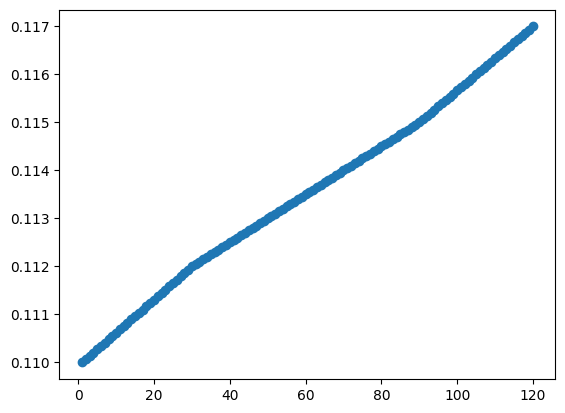

In [9]:
t=np.arange(min(tiempo),max(tiempo)+1)

r_t_interp=np.interp(t,tiempo,r_t)

plt.plot(t,r_t_interp,'o')

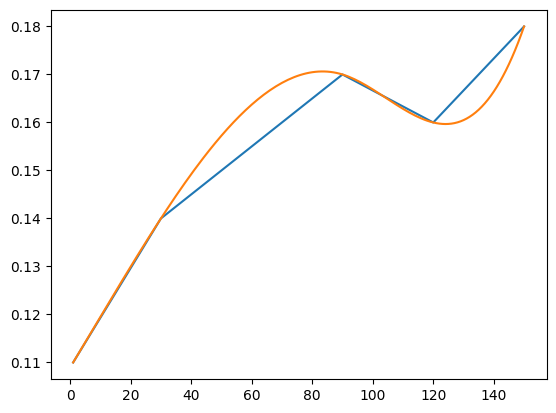

In [10]:
#Obtener lo mismo  pero ahora con una curva de tasas
tiempo=[1,30,90,120,150]
r_t=[0.11,0.14,0.17,0.16,0.18]
t=np.arange(min(tiempo),max(tiempo)+1)

r_t_interp=np.interp(t,tiempo,r_t)

r_t_cs= CubicSpline(tiempo,r_t)

plt.plot(t,r_t_interp)
plt.plot(t,r_t_cs(t))

#plt.plot(t,r_t_interp)

### Forward o futuros

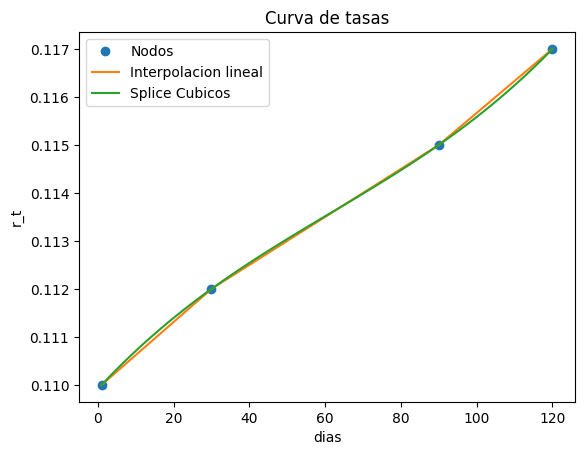

In [11]:
#Obtener lo mismo  pero ahora con una curva de tasas
tiempo=[1,30,90,120]
r_t=[0.11,0.112,0.115,0.117]
t=np.arange(min(tiempo),max(tiempo)+1)

r_t_interp=np.interp(t,tiempo,r_t)

r_t_cs= CubicSpline(tiempo,r_t)

plt.plot(tiempo,r_t,'o')
plt.plot(t,r_t_interp)
plt.plot(t,r_t_cs(t))

plt.title('Curva de tasas')
plt.xlabel('dias')
plt.ylabel('r_t')
plt.legend(['Nodos','Interpolacion lineal','Splice Cubicos'])
plt.show()

#plt.plot(t,r_t_interp)

In [12]:
r_t_interp=np.interp(100,tiempo,r_t)
print(r_t_interp)
print(r_t_cs(100))



0.11566666666666667
0.11558277305497947


In [13]:
#Curva de tasa
tiempo= [1,30,90,120]
r_t=[0.11,0.112,0.115,0.117]

#Datos del forward
S0=5000
T=100
r_t_interp=np.interp(T,tiempo,r_t)

#strike justo
k_justo=S0*np.exp(r_t_interp*T/360)
print('El strike justo es de:',K_justo)

#Evaluamos en t
St=5100
t=20
#pb=150

#La nueva curva con incremento en 100 pb
r_t_pb=[0.11,0.13,0.15,0.17]
#[i+pb/10000 for i in r_t]

r_t_interp=np.interp(T-t,tiempo,r_t_pb)
print('La tasa spot a',T-t,'Dias es de:',r_t_interp)

#Valuacion del forward

VPF_PosLarga=St-K_justo*np.exp(-r_t_interp*(T-t)/360)
VPF_PosCorta=K_justo*np.exp(-r_t_interp*(T-t)/360)-St

print('El precio virtual de una posicion larga es de:',VPF_PosLarga)
print('El precio virtual de una posicion corta es de:',VPF_PosCorta)


El strike justo es de: 5163.261575007652
La tasa spot a 80 Dias es de: 0.14666666666666667
El precio virtual de una posicion larga es de: 102.30965157181163
El precio virtual de una posicion corta es de: -102.30965157181163
